<a href="https://colab.research.google.com/github/rim-yu/SGU_ANT6320_Assignment/blob/master/Exercise05_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lesson4 : https://course.fast.ai/videos/?lesson=4

detailed note : https://github.com/hiromis/notes/blob/master/Lesson4.md

**Collaborative Filtering**

collaborative filtering은 추천 시스템 내에서 널리 쓰이는 방식. 콘텐츠 자체를 분석하지 않고 user의 평가, 피드백을 기반으로 추천하는 것을 의미. 세부적인 지표를 비교적 신경쓸 필요가 없음. 해당 콘텐츠가 어떤 것인지 관심이 없고 해당 콘텐츠에 내린 평가에 중점을 둔다. 

이에 대한 것 : https://blog.naver.com/shino1025/221861980501

추천 알고리즘의 방법(User-based vs. Item-based): https://www.slideshare.net/springloops/collaborative-filtering-23732558

**추천 시스템(recommender system)이란 사용자(user)가 선호하는 상품(item)을 예측하는 시스템이다.**

Amazon과 같은 인터넷 쇼핑 사이트나 Netflix 등의 온라인 비디오 콘텐츠 제공 사이트는 사용자가 각각의 상품에 대해 평가한 평점(rate)을 가지고 있다. 이 기록을 기반으로 해서 사용자에게 어떤 상품을 추천할지 예측하게 된다.

이에 대한 것 : https://datascienceschool.net/view-notebook/fcd3550f11ac4537acec8d18136f2066/


**Embedding**

An embedding, not surprisingly, is a matrix of weights. Specifically, an embedding is a matrix of weights that looks something like this:

단어 임베딩에 대한 것 : https://datascienceschool.net/view-notebook/6927b0906f884a67b0da9310d3a581ee/

단어 임베딩에 대한 것을 보다가 자세한 페이지를 또 발견 : https://www.r-craft.org/r-news/get-busy-with-word-embeddings-an-introduction/ 

**What is weight and bias in neural network?**

In Neural network, some inputs are provided to an artificial neuron, and with each input a weight is associated. Weight increases the steepness of activation function. This means weight decide how fast the activation function will trigger whereas bias is used to delay the triggering of the activation function.

we've prepared a little IMDB sample that you can use which is in CSV file. You can read it in with Pandas and there's negative or positive, the text of each movie review, and boolean of is it in the validation set or the training set.

In [0]:
from fastai.collab import *
from fastai.tabular import *
# fastai.collab, fastai.tabular의 모든 module을 import한다. 

## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [0]:
user, item, title = 'userId','movieId','title'
# collab models use data in a DataFrame of user, items, and ratings. 이들에 userId, movieId, title로 string 값을 부여하였음. 

In [0]:
path = untar_data(URLs.ML_SAMPLE)
path
# /root/.fastai/data 경로 아래 movie_lens_sample folder을 생성, ratings.csv file을 download.

PosixPath('/root/.fastai/data/movie_lens_sample')

In [0]:
cd /root/.fastai/data/movie_lens_sample

/root/.fastai/data/movie_lens_sample


In [0]:
ls

ratings.csv*


In [0]:
cd /content

/content


In [0]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head() 
# timestamp : 어느 시점에 데이터가 존재했다는 사실을 증명하기 위하여 특정 위치에 표시하는 시각. 여기선 일단 무시한다고 함. 
# rating : 영화 등급을 의미. 
# ratings 첫 5개 행을 보여줌. 

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
len(ratings)
# 영화 등급으로 6031개의 값이 있음. 

6031

That's all we need to create and train a model:

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)
# dataframe을 통해 CollabDataBunch object를 만들어서 data에 저장한다. 
# collaborative filtering을 위한 DataBunch임. from_df를 통해서만 object가 생성된다.  

In [0]:
y_range = [0, 5.5]
# rating이 5인 경우가 빈번하기 때문에 y_range의 최대값을 조금 더 크게 설정하는 것.  

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)
# collaborative filtering를 위한 learner을 만들어 learn에 저장한다. 

# collaborative filtering에서 사용하는 factor의 갯수 = 50. 
# The n_factors parameter determines the size of our embeddings. 
# n_factors는 매트릭스의 너비임. 모델 구조 설계 수준에서의 결정임.  

# y_range는 마지막 활성화 함수를 s function으로 만든다.

In [0]:
learn.model
# about Embedding dot Bias : https://seing.tistory.com/3 https://towardsdatascience.com/collaborative-filtering-and-embeddings-part-1-63b00b9739ce

EmbeddingDotBias(
  (u_weight): Embedding(101, 50)
  (i_weight): Embedding(101, 50)
  (u_bias): Embedding(101, 1)
  (i_bias): Embedding(101, 1)
)



> **how does n_factor work in the notebook**


collab_learner(data, n_factors:int=None, use_nn:bool=False, emb_szs:Dict[str, int]=None, layers:Collection[int]=None, ps:Collection[float]=None, emb_drop:float=0.0, y_range:OptRange=None, use_bn:bool=True, bn_final:bool=False, **learn_kwargs) 

More specifically, binds data with a model that is either an EmbeddingDotBias with n_factors if use_nn=False or a EmbeddingNN with emb_szs otherwise. In both cases the numbers of users and items will be inferred from the data, y_range can be specified in the kwargs and you can pass metrics or wd to the Learner constructor.


> **EmbeddingDotBias** : Base dot model for collaborative filtering.

Creates a simple model with Embedding weights and biases for n_users and n_items, with n_factors latent factors. Takes the dot product of the embeddings and adds the bias, then if y_range is specified, feed the result to a sigmoid rescaled to go from y_range[0] to y_range[1].





 > **about embedding**


추천 시스템을 만들기 위해서 사람들과 영화를 **embedding** 해야함. 여기서 embedding한다는 것은 사람이나 영화를 각각의 특징들을 나타낼 수 있는 **vector**로 나타낸다는 뜻임. 사람과 영화를 vector로 embedding함으로써 두 vector간의 연산을 통해 서로간의 **유사도**를 구할 수 있음. 유사도를 구하기 위한 연산으로는 dot product, euclidean distance, cosine similarity 등을 활용할 수 있음. 

참고 링크 : https://seing.tistory.com/3

In [0]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.614029,0.956510,00:01
1,0.836646,0.678357,00:00
2,0.636150,0.670362,00:00


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,0.571646,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.




> lr_find()에 대해서 다시 알게 됨.


we choose a value that is approximately in the middle of the sharpest downward slope. Don't just pick the minimum value from the plot! 

graph에서 가장 가파른 하향 경사에 있는 중간값을 learning rate로 고르는 것이었음.


> 조교님 코멘트 



learning rate와 cycle 방법을 이해하기 위해 : https://arxiv.org/abs/1506.01186

https://docs.fast.ai/callbacks.one_cycle.html#What-is-1cycle?


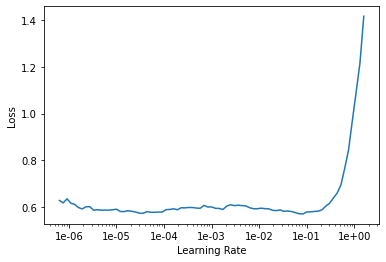

In [0]:
learn.recorder.plot()

## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip 

MovieLense라는 영화 추천 웹사이트의 데이터를 샘플 평점 데이터로 제공.


> **ml-100k 다운로드 방법** 


(1) 위 링크를 통해 zip 파일을 구글 드라이브에 저장한다.

(2) cp command를 통해 zip 파일을 원하는 경로(/root/.fastai/data)로 이동(사실 복사한 것임)한다. 그럼 /root/.fastai/data/ml-100k.zip이 생성이 되겠쥬.

(3) unzip command를 통해 zip 파일을 푼다.(ex4-planet 참고..) 그럼 /root/.fastai/data/ml-100k이 생성이 되겠쥬.

(3) 아래에선 ~/ml-100k/u.data 를 사용하는 듯 합니당.. 

(4) 왜인지는 모르겠는데 경로설정 정신 똑바로 차리고 해야됨. 

이걸 통해 뜬금없이 알게된 사실 : 경로에는 .fastai 앞에 \ 안해줘도 된당. mkdir 할 때나 \.kaggle 이런 식으로 하는 것 같당.

In [0]:
path=Config.data_path()#/'ml-100k'
# data folder 바로 밑에 ml-100k.zip file을 unzip하기 위함. 
# 이렇게 하지 않으면 data/ml-100k/ml-100k folder 아래 unzip되어 file들이 생성되었음. 

In [0]:
path

PosixPath('/root/.fastai/data')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! cp /content/drive/"My Drive"/"required files for ML"/ml-100k.zip /root/.fastai/data

In [0]:
! unzip -q -n {path}/ml-100k.zip -d {path}

In [0]:
cd /root/.fastai/data

/root/.fastai/data


In [0]:
ls

ml-100k/  ml-100k.zip  movie_lens_sample/  movie_lens_sample.tgz


In [0]:
# csv 파일이 궁금해진 나는 이거를 직접 보기로 하였당.
! cp /root/.fastai/data/ml-100k/u.data /content/drive/"My Drive"
! cp /root/.fastai/data/ml-100k/u.item /content/drive/"My Drive"

"""
u.data는 ratings command의 output과 동일했고, 
u.item은 1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
이런 식으로 tab(delimiter)으로 문자들이 구분되어있는 것을 볼 수 있었다. 
실제 data에선 title, date 등 columns가 정해져있진 않았다.(u.data도 마찬가지.) pd.read_csv function의 names는 columns의 name을 정하는 듯 하당. 
"""

In [0]:
path=Config.data_path()/'ml-100k'
# ml-100k folder 아래 file들을 다루기 위해 path를 재설정하였음. 

In [0]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user, item, 'rating', 'timestamp'])
ratings.head()
# 데이터의 분리 문자(delimiter)는 tab(\t)이다. 

# header=None : headr 행이 없다는 것을 알린 후,
# names=[x1, x2, x3, x4] : headr 행이 없기 때문에 header의 이름도 정해준다. . 

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
len(ratings)
# ratings의 행의 갯수가 10,000개임. 데이터 갯수가 10,000개를 의미한다. 

100000

In [0]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

# g는 유저가 rating을 했는지 표현한 거고, N은 genre(장르)를 표현하는데 NaN은 장르가 없다는 것을 보여준다. 
# encoding='latni-1' : 이 command를 삭제하면 오류가 발생함. 파이썬은 유니 코드를 표준으로 사용하고 있지만 영어를 기준으로 한 비유니 코드의 경우 'latin-1'을 설정해주어야 한다. 

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0




> 조교님 코멘트


g는 유저가 rating을 했는지 표현하는거고 N은 genre 표현하는데 NaN은 "no genre listed" 뜻

In [0]:
rating_movie = ratings.merge(movies[[item, title]]) # merge 함수로 dataframe 합칠 수 있음. item(movieId), title을 합침.  
rating_movie.head()

# rating's header names = [user, item, 'rating', 'timestamp'])
# movie's header names = [item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]]

# title과 rating을 함께 보여주고 싶은 것임. 

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)
# rating_movie를 통해 CollabDataBunch object를 생성한다. valid의 percentage는 10%로 할당하였음. 

In [0]:
data
# 협업 필터링 데이터의 기본 설정에서(CollabDataBunch) 첫 번째 열은 userId, 두 번째 열은 movieId, 세 번째 열은 rating임. (원래 그리 설정되어있음.)

TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None



> 조교님 코멘트


floatlist = rating

target = rating

movieid와 title 합친 이유 : 보기 더 편함

lesson 5에 설명 더 있음

In [0]:
data.show_batch() 

userId,title,target
486,2 Days in the Valley (1996),4.0
344,Apt Pupil (1998),5.0
660,"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",2.0
528,Face/Off (1997),4.0
343,Philadelphia (1993),5.0




> 조교님 코멘트


CollabDatabunch = databunch for collaborative filtering, 자동으로 잡히는 것 맞아요

In [0]:
y_range = [0, 5.5]
# rating이 5인 경우가 빈번하기 때문에 y_range의 최대값을 조금 더 크게 설정하는 것. 

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1) 
# 협업 필터링을 위한 학습자를 만들어서 learn에 저장한다.  
# wd : weight decay for epochs. 정규화 방법. 
# y_range는 마지막 활성화 함수를 s function으로 만든다. 
# n_factors는 매트릭스의 너비임. 모델 구조 설계 수준에서의 결정임. 40이 높은 성능을 보였음. (경험적인 듯.) 

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


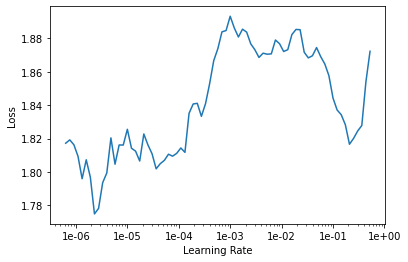

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)
# skip_end : 마지막에 있는 integer들 skip한다. 



> 조교님 코멘트


skipend은 마지막에 있는 integer들 skip하는 것임

In [0]:
learn.fit_one_cycle(5, 5e-2)

epoch,train_loss,valid_loss,time
0,1.327123,1.376556,00:13
1,1.601844,1.571571,00:13
2,1.260615,1.225502,00:13
3,0.938176,0.930072,00:13
4,0.726580,0.861103,00:13


In [0]:
learn.fit_one_cycle(5, 5e-3) 

epoch,train_loss,valid_loss,time
0,0.954022,0.941275,00:09
1,0.875767,0.880459,00:08
2,0.785743,0.837372,00:09
3,0.675648,0.816720,00:09
4,0.553013,0.814406,00:09


In [0]:
learn.save('dotprod')
# 학습한 내용을 저장하였음. 

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup



> **Bias**


관찰된 등급 값의 편차(variation)은 상호 작용과 관계없이 편향(bias) 또는 절편(intercept)으로 알려진 사용자 또는 아이템과 관련된 영향으로 인한 것이다. 예를 들어 일반적인 collaborative filtering data는 일부 사용자가, 다른 사용자보다 높은 등급을 부여하고, 일부 아이템이 다른 아이템보다 높은 등급을 받는, 큰 체계적인(systematic) 경향(tendency)을 나타낸다. **결국 일부 아이템은 다른 아이템보다 더 좋게 혹은 더 나쁘게 인식된다.**


> **Bias 구하기**


바이어스는 평균(average)으로부터 사용자 및 아이템에서 관측된 표준 편차(deviations)를 나타낸다. 예를 들어 타이타닉 영화의 사용자 rim의 등급에 대한 1차 예상치를 원한다고 가정할 때, **(1) 모든 영화에 대한 평균 평점은 3.7 등급이고, (2) 타이타닉 영화는 평균 영화보다 평균 이상으로 0.5등급을 얻는 경향이 있고, (3) rim은 평균 사용자보다 0.3 등급 낮은 경향이 있다.** 이 때 rim의 타이타닉 등급 평가는 3.9(3.7+0.5-0.3)이다. 

참고 링크 : https://jeongchul.tistory.com/553


> **User-Based Collaborative Filtering**


사용자 기반의 협업 필터링에서의 유사도는 두 사용자가 얼마나 유사한 항목(아이템)을 선호했는지를 기준으로 한다. 사용자 기반에서는 한 사용자가 평가한 영화들의 점수들을 벡터로 나타낼 수 있다. 두 사용자 간의 유사도는 두 벡터 간의 유사도로 정의할 수 있다. 두 벡터 간의 유사도를 구하기 위해서 대개는 코사인 유사도, 피어슨 유사도가 이용된다. + 비슷한 사용자들을 알아내어 이 사용자들이 공통적으로 좋게 평가한 아이템을 추천하는 것임. 


> **Item-Based Colaborative Filtering**

아이템 기반도 사용자 기반과 매우 유사한 과정을 거친다. 여기서는 아이템들에 대한 유사도를 계산한다. 두 아이템에 대한 사용자들의 평가 점수를 벡터로 나타내 두 영화의 유사도를 구하는 것임. 만약 영화 A와 B의 유사도가 0.99로 상당히 높은 유사도를 보인다면 A를 좋아하는 사람은 B를 좋아할 확률이 높다는 말로 풀이될 수 있음. 

In [0]:
learn.load('dotprod');
# 학습한 내용을 로드함. 

In [0]:
learn.model
# n_factors = 40. 
# bias : Bias for item or user (based on is_item) for all in arr. 
# weight : Weight for item or user (based on is_item) for all in arr.

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [0]:
g = rating_movie.groupby(title)['rating'].count()
# title별로 rating의 갯수를 count함. (count() 함수는 데이터 갯수를 세어주는 함수임.)
# 사용자의 각 영화 평가 수. 영화에 rating을 부여한 사용자 수를 뽑는다. 

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [0]:
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]
# sort_values() : g값에 대해 정렬을 수행한다. ascending=False일 경우 내림차순.(높은 값부터 1,000개 찍어냄.)
# 좋은 영화인지는 모르겠지만 사용자들이 가장 많이 본 영화라고 할 수 있음.

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [0]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape
# is_item = True : 영화의 bias를 원한다는 의미임. False는 사용자의 bias를 의미한다. 

torch.Size([1000])

In [0]:
movie_bias[:10]

tensor([0.5472, 0.3980, 0.3906, 0.4126, 0.0895, 0.1334, 0.2239, 0.2915, 0.2949,
        0.1485])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean() 
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies, movie_bias)]
# top_movies의 title, bias 및 mean을 합친다. 
# zip() : 같은 column끼리 묶인다. 

In [0]:
# mean_ratings = rating_movie.groupby(title)['rating'].mean() 
mean_ratings
# title로 groupby돼서 각 title에 대한 rating의 평균값을 보여준다. 

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [0]:
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies, movie_bias)] 
movie_ratings[:10]
# i는 title임. 즉 mean_ratings.loc['title'].
# bias - title - mean.

[(tensor(0.5472), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.3980), 'Contact (1997)', 3.8035363457760316),
 (tensor(0.3906), 'Fargo (1996)', 4.155511811023622),
 (tensor(0.4126), 'Return of the Jedi (1983)', 4.007889546351085),
 (tensor(0.0895), 'Liar Liar (1997)', 3.156701030927835),
 (tensor(0.1334), 'English Patient, The (1996)', 3.656964656964657),
 (tensor(0.2239), 'Scream (1996)', 3.4414225941422596),
 (tensor(0.2915), 'Toy Story (1995)', 3.8783185840707963),
 (tensor(0.2949), 'Air Force One (1997)', 3.6310904872389793),
 (tensor(0.1485), 'Independence Day (ID4) (1996)', 3.438228438228438)]

In [0]:
item0 = lambda o:o[0]
# bias 크기를 사용해서 영화를 재정렬할 수 있다. 

In [0]:
sorted(movie_ratings, key=item0)[:15] 
# bias가 낮은 15개를 보여준다. 'Cable Guy, The (1996)' 영화는 등급이 2 이상임. 

[(tensor(-0.3817),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3180), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.3105),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2661), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2583), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2514), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2502), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2473), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2441), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2219), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2179), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2152), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2139), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2131), 'Speed 2: Cruise Control (1997)', 2.1315789473684212),
 (tensor(-0.2105), "Stephen Kin

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15] 
# bias가 높은 15개를 보여준다. 

[(tensor(0.5875), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5558), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5472), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5467), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5435), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5346), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5261), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5146), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5108), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5006), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4754), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4652), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4588), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4583), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4431), 'Close Shave, A (1995)', 4.491071428571429)]

### Movie weights

https://towardsdatascience.com/collaborative-filtering-using-fastai-a2ec5a2a4049
이거 참고해서 마지막으로 정리하고 제출하기. 

In [0]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape
# top_movies에서 weight를 가져온다. is_item = True는 영화의 bias를 원한다는 의미임.
# 우리가 설정한 n_factor가 40이기 때문에 결과 행렬은 (1000, 40)임.
# 5개의 열, 매개변수 값 대신 40개의 매개변수 값을 가짐. 영화의 '특정 특성'을 설명하기 위함이다. 
# 우리가 할 일은 40가지 잠재 요인을 3으로 압축하는 것임.   

torch.Size([1000, 40])

In [0]:
movie_pca = movie_w.pca(3)
movie_pca.shape
# pca(principal component analysis) : 고차원의 데이터를 저차원의 데이터로 환원시키는 기법이다. 선형 변형 함수임. 
# torch.Size([1000, 40]) -> torch.Size([1000, 3])으로 줄어든 것을 확인할 수 있다.

torch.Size([1000, 3])

In [0]:
fac0, fac1, fac2 = movie_pca.t() # 잠재 요소를 추출하여 fac0, fac1, fac2라고 부른다. 
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)] # fac0으로 병합한다. 첫 번째 특정 특성. 

In [0]:
movie_comp[:10] 

[(tensor(-0.6179), 'Star Wars (1977)'),
 (tensor(-0.0422), 'Contact (1997)'),
 (tensor(-0.8793), 'Fargo (1996)'),
 (tensor(-0.1756), 'Return of the Jedi (1983)'),
 (tensor(0.6166), 'Liar Liar (1997)'),
 (tensor(-0.4384), 'English Patient, The (1996)'),
 (tensor(0.3783), 'Scream (1996)'),
 (tensor(-0.2077), 'Toy Story (1995)'),
 (tensor(0.3920), 'Air Force One (1997)'),
 (tensor(0.4646), 'Independence Day (ID4) (1996)')]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10] # 내림차순.
# 무엇을 의미하는진 모르지만 특정 특성이 될 것임. 매우 클래식한, 고전으로 판단되는 영화들임. 

[(tensor(1.2699), 'Jungle2Jungle (1997)'),
 (tensor(1.2694), "McHale's Navy (1997)"),
 (tensor(1.2373), 'Home Alone 3 (1997)'),
 (tensor(1.1594), 'Congo (1995)'),
 (tensor(1.1478), 'Leave It to Beaver (1997)'),
 (tensor(1.1253), 'Bio-Dome (1996)'),
 (tensor(1.1105), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.0865), 'Sliver (1993)'),
 (tensor(1.0648), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.0018), 'Batman & Robin (1997)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10] # 오름차순. 
# 영화의 특정 특성이 일부 사람들의 영화에 대한 선호도와 일치하는 것으로 추정된다. 

[(tensor(-1.0923), 'Casablanca (1942)'),
 (tensor(-1.0479), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0467), '12 Angry Men (1957)'),
 (tensor(-1.0425), 'Close Shave, A (1995)'),
 (tensor(-1.0414), 'Chinatown (1974)'),
 (tensor(-1.0125), 'Third Man, The (1949)'),
 (tensor(-0.9610), 'Godfather, The (1972)'),
 (tensor(-0.9501), 'Apocalypse Now (1979)'),
 (tensor(-0.9396), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9360), 'Persuasion (1995)')]

In [0]:
movie_comp_ = [(f, i) for f,i in zip(fac1, top_movies)] # 다른 잠재요인. 

In [0]:
sorted(movie_comp_, key=itemgetter(0), reverse=True)[:10] # 내림차순.
# 가족과 함께 볼 수 있는 영화들임. 

[(tensor(0.8739), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8714), 'Keys to Tulsa (1997)'),
 (tensor(0.8388), 'Dead Man (1995)'),
 (tensor(0.7887), 'Serial Mom (1994)'),
 (tensor(0.7856), 'Trainspotting (1996)'),
 (tensor(0.7632), 'Cable Guy, The (1996)'),
 (tensor(0.7608), 'Clockwork Orange, A (1971)'),
 (tensor(0.7508), 'Showgirls (1995)'),
 (tensor(0.7461), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7300), 'To Die For (1995)')]

In [0]:
sorted(movie_comp_, key=itemgetter(0))[:10] # 오름차순.

[(tensor(-1.1372), 'Raiders of the Lost Ark (1981)'),
 (tensor(-1.1169), 'Braveheart (1995)'),
 (tensor(-1.0411), 'Titanic (1997)'),
 (tensor(-0.9260), 'American President, The (1995)'),
 (tensor(-0.8753), "It's a Wonderful Life (1946)"),
 (tensor(-0.8666), 'Forrest Gump (1994)'),
 (tensor(-0.8601), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8458), 'Field of Dreams (1989)'),
 (tensor(-0.8381), 'Top Gun (1986)'),
 (tensor(-0.8133), 'Sleepless in Seattle (1993)')]

In [0]:
top_movies # 영화 순위. 

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', ...,
       'In the Bleak Midwinter (1995)', 'Party Girl (1995)', 'Highlander III: The Sorcerer (1994)',
       'Bastard Out of Carolina (1996)'], dtype=object)

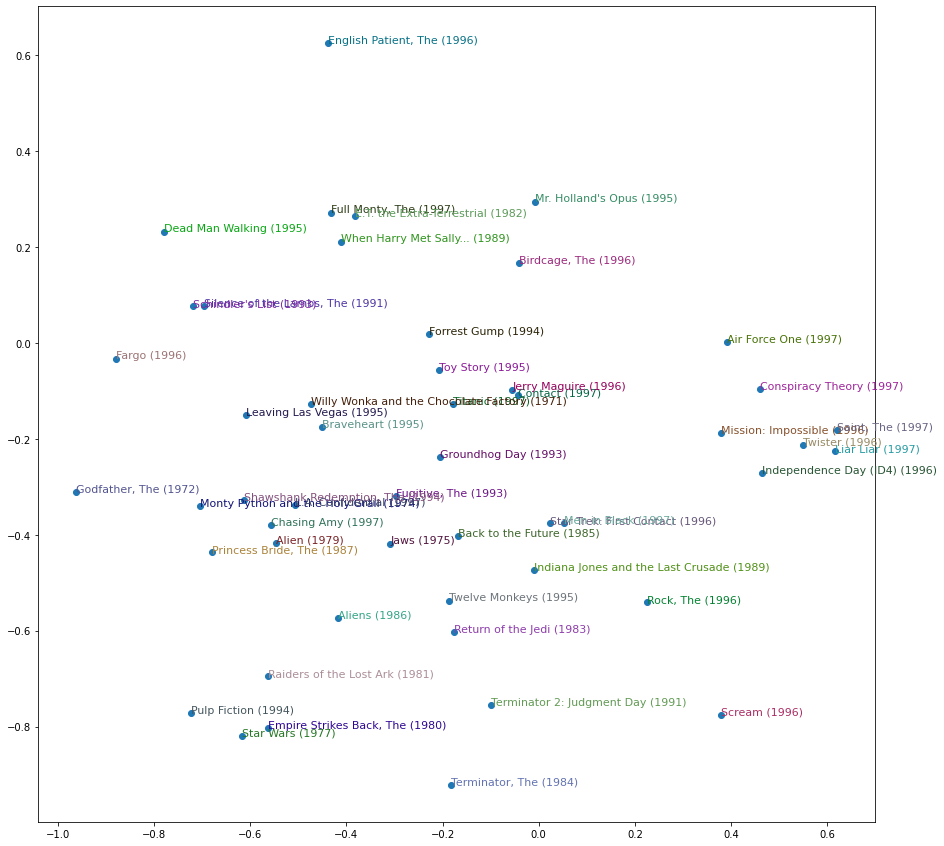

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))

X = fac0[idxs] # 첫 번째 특정 특성. 
Y = fac2[idxs] # 두 번째 특정 특성.

plt.figure(figsize=(15,15))
plt.scatter(X, Y)

for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x, y, i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

# 가장 인기있는 50가지 영화를 보여준다. top_moives - fac0 - fac2, 영화의 등급을 기준으로 fac0과 fac2를 보여줌. 
# 영화마다 f0, f1, f2가 다름. 즉 영화마다 특정 특성이 다른 것을 보여준다.  